C:\Users\gbert\AppData\Local\Temp\ipykernel_35032\3389233830.py:14: RuntimeWarning: invalid value encountered in sqrt
  return np.where((x > -A) & (x < A), 1/(np.pi*np.sqrt(A**2-x**2)), 0)


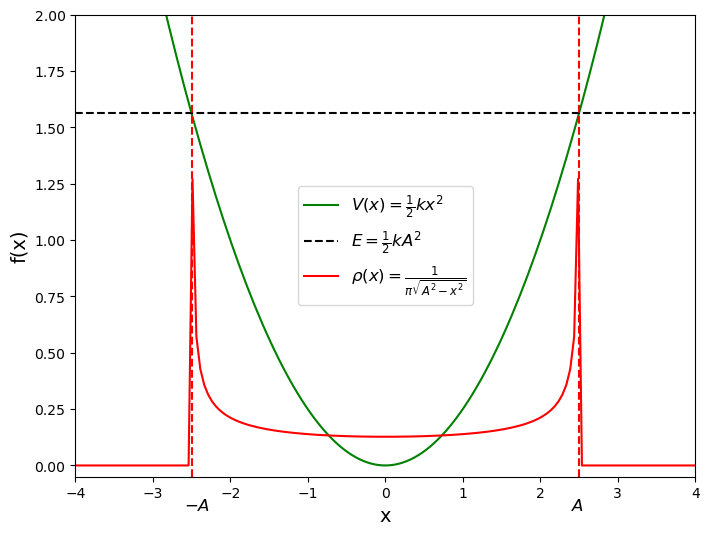

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 0.5
A = 2.5
E = 0.5 * k * A**2

# Define functions
def v(x):
    return 0.5 * k * x**2

def rho(x):
    return np.where((x > -A) & (x < A), 1/(np.pi*np.sqrt(A**2-x**2)), 0)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Green curve for v(x)
x = np.linspace(-2*A, 2*A, 200)
y = v(x)
ax.plot(x, y, 'g-', label=r'$V(x)=\frac{1}{2}kx^2$')

# Dotted horizontal line for E
ax.axhline(y=E, color='k', linestyle='--', label=r'$E = \frac{1}{2}kA^2$')

# Horizontal lines for x=-A and x=A
ax.axvline(x=-A, color='r', linestyle='--')
ax.axvline(x=A, color='r', linestyle='--')
ax.text(-A-0.1, -0.2, r'$-A$', fontsize=12)
ax.text(A-0.1, -0.2, r'$A$', fontsize=12)

# Blue curve for rho(x)
y = rho(x)
ax.plot(x, y, 'r-', label=r'$\rho(x)=\frac{1}{\pi \sqrt{A^2-x^2}}$')

# Formatting
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('f(x)', fontsize=14)
ax.set_ylim([-0.05, 2])
ax.set_xlim([-4, 4])
ax.legend(fontsize=12)
plt.savefig('1_11_1.png')

plt.show()
